## **Assignment 1 - ML Models**

### **Abstract**

Cardiovascular disease is the name for the group of disorders of heart and blood vessels. They include: hypertension, coronary heart disease(heart attack), stroke and a few others. CVD can be caused from a variety of reasons such as unhealthy diet, lack of exercise, being overweight or smoking. The objective of this notebook is to predict whether the person has any sort of CVD present in an individual by studying the features that causes it. By training and optimizing a model, we can try to predict from an individual's features whether said individual has a cardio vascular disease or not. This model can also be used to forecast if an individual might acquire a CVD in the future.

### **Data**

The dataset obtained from one of the kaggle competitions provides us with 11 potential characteristics or features of an individual such as height, weight, presence of cholestrol or whether the individual smokes cigarettes. The target variable is the CardioVascular Disease which is represented as 1 indicating disease present and 0 if the individual does not have CVD

Kaggle Dataset link - https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [198]:
#Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt   

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from matplotlib import rcParams
from sklearn import metrics
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot



#Visualization 
import seaborn as sns

%matplotlib inline

In [199]:
%pwd

'/content'

### **Reading the Data**

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('drive/My Drive/Colab Notebooks/cardio_train.csv', sep =';') 

Mounted at /content/drive


In [ ]:
print(df.shape)

(68757, 14)


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000
mean,49967.645112,53.323414,1.349099,164.448100,73.964671,126.293817,81.318760,1.363818,1.225126,0.087976,0.053595,0.803322,0.494379,27.381203
std,28844.708125,6.768052,0.476689,7.861852,13.936888,17.681518,9.858513,0.678258,0.570987,0.283263,0.225217,0.397490,0.499972,5.043304
min,0.000000,30.000000,1.000000,98.000000,28.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,24998.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50010.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488
75%,74859.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.110991
max,99999.000000,65.000000,2.000000,250.000000,180.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,50.000000


### **Pre-Processing the Dataset**

In [ ]:
#Converting the height and weight into BMI as a separate column and dropped the two columns
df.drop_duplicates(inplace=True)
df["bmi"] = df["weight"]/(df["height"]/100)**2
out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200))
df=df[~out_filter]
df.head()
df.shape

(69007, 14)

In [ ]:
#The min and max values for features ap_hi and ap_lo have high variation. Considering the mean, dropping all outliers

out_filter2 = ((df["ap_hi"]<0) | (df["ap_lo"] < 0))
df = df[~out_filter2]
df.shape

(68999, 14)

In [ ]:
#Filtering BMI outliers

out_filter3 = ((df["bmi"]<10) | (df["bmi"]>50))
df = df[~out_filter3]

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000
mean,49967.645112,19463.239045,1.349099,164.448100,73.964671,126.293817,81.318760,1.363818,1.225126,0.087976,0.053595,0.803322,0.494379,27.381203
std,28844.708125,2468.299119,0.476689,7.861852,13.936888,17.681518,9.858513,0.678258,0.570987,0.283263,0.225217,0.397490,0.499972,5.043304
min,0.000000,10798.000000,1.000000,98.000000,28.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,24998.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50010.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488
75%,74859.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.110991
max,99999.000000,23713.000000,2.000000,250.000000,180.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,50.000000


In [ ]:
#Converting age from days-old to years

df["age"] = (df["age"]/365).round().astype('int')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [ ]:
#Dropping height, weight and id from the dataset. Height and weight features have been converted to BMI
df1 = df.drop(["id", "height", "weight"], axis = 1)
print(df1.shape)


(68757, 11)


In [ ]:
df1.describe()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000,68757.000000
mean,53.323414,1.349099,126.293817,81.318760,1.363818,1.225126,0.087976,0.053595,0.803322,0.494379,27.381203
std,6.768052,0.476689,17.681518,9.858513,0.678258,0.570987,0.283263,0.225217,0.397490,0.499972,5.043304
min,30.000000,1.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,48.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488
75%,58.000000,2.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.110991
max,65.000000,2.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,50.000000


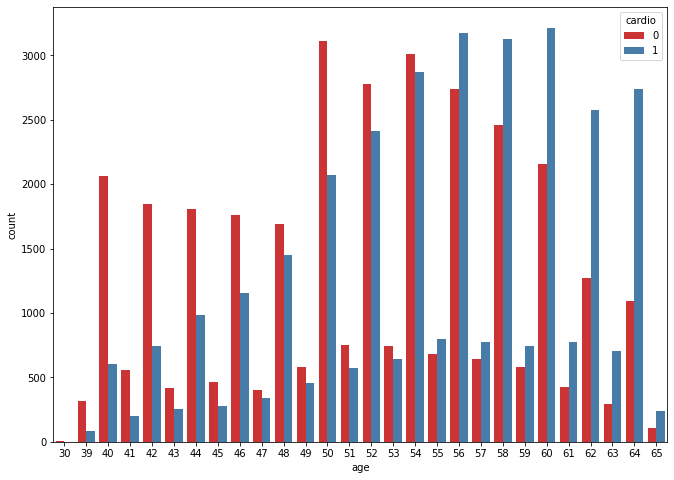

In [ ]:
#As per the below graph, we see that the presence of CVD increases linearly with increase in age
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue = 'cardio', data = df1, saturation=0.75, palette = "Set1")

**Determining Correlation Between the columns**

In [224]:
df1.corr(method='pearson')

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.022878,0.198274,0.150921,0.155191,0.098812,-0.048009,-0.029291,-0.010269,0.239593,0.105550
gender,-0.022878,1.000000,0.059205,0.065574,-0.036109,-0.020396,0.338895,0.170909,0.005516,0.008020,-0.110535
ap_hi,0.198274,0.059205,1.000000,0.645713,0.185903,0.086894,0.028234,0.031794,0.000530,0.401739,0.253254
ap_lo,0.150921,0.065574,0.645713,1.000000,0.155010,0.074849,0.024681,0.042980,-0.001141,0.328772,0.233784
cholesterol,0.155191,-0.036109,0.185903,0.155010,1.000000,0.449889,0.010013,0.035927,0.009058,0.221571,0.173495
gluc,0.098812,-0.020396,0.086894,0.074849,0.449889,1.000000,-0.005556,0.011356,-0.007858,0.089081,0.117289
smoke,-0.048009,0.338895,0.028234,0.024681,0.010013,-0.005556,1.000000,0.340331,0.025538,-0.016277,-0.033223
alco,-0.029291,0.170909,0.031794,0.042980,0.035927,0.011356,0.340331,1.000000,0.025305,-0.007722,0.018697
active,-0.010269,0.005516,0.000530,-0.001141,0.009058,-0.007858,0.025538,0.025305,1.000000,-0.037435,-0.015306
cardio,0.239593,0.008020,0.401739,0.328772,0.221571,0.089081,-0.016277,-0.007722,-0.037435,1.000000,0.192712


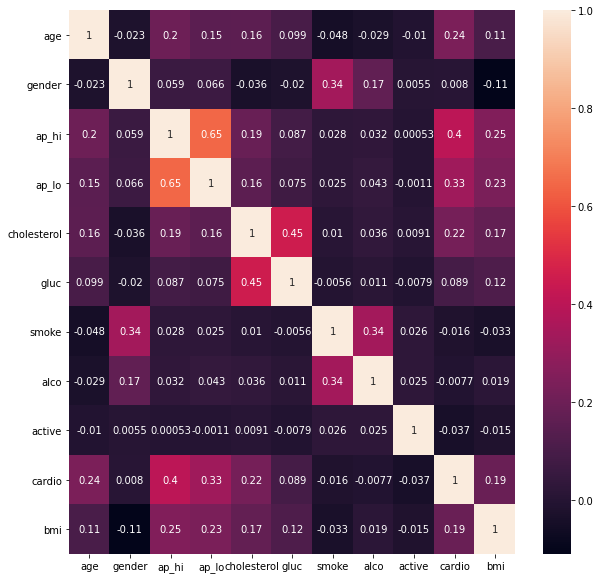

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot = True)

**Determining Multicolinearity in the Dataset**

In [222]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [223]:
X = df1
calc_vif(X)

,variables,VIF
0,age,47.861919
1,gender,9.877330
2,ap_hi,95.909555
3,ap_lo,105.412339
4,cholesterol,6.751961
5,gluc,7.013554
6,smoke,1.367274
7,alco,1.203721
8,active,4.967397
9,cardio,2.284870


### **Splitting the Data**

In [ ]:
#Splitting Train and Test set. 80-20 split

def mydf_splitter(my_df, num_rows):
  return my_df[:num_rows].copy(),my_df[num_rows:]

df_train,df_test = mydf_splitter(df1, 50000)

print(df_train.shape, df_test.shape)

(50000, 11) (18757, 11)


In [ ]:
x = df_train.drop("cardio", axis = 1)
y = df_train['cardio']
print(x.shape)
print(y.shape)

(50000, 10)
(50000,)


In [ ]:
#Splitting Training set into Training and Validation Set
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state = 1)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(37500, 10) (12500, 10) (37500,) (12500,)


In [ ]:
#Prepping test set
x_test = df_test.drop("cardio", axis = 1)
y_test = df_test["cardio"]
print(x_test.shape, y_test.shape)

(18757, 10) (18757,)


## **Training the Models**

**1. Random Forests with GridSearchCV**

In [215]:
#Model is built and the best hyperparameters are used.
model1_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [300], 'max_depth': [10]}, cv=5)

model1_rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [216]:
#Predicting Training Set Accuracy
y_pred = model1_rf.predict(x_train)

model1_rf_accuracy = accuracy_score(y_train, y_pred)
print(model1_rf_accuracy, model1_rf.best_params_ )

0.75536 {'max_depth': 10, 'n_estimators': 300}


In [233]:
#Predicting Validation Set Accuracy
y_pred1 = model1_rf.predict(x_val)

model1_rf_cr = classification_report(y_val, y_pred1)
print(model1_rf_accuracy1)

0.73768


In [232]:
model1_rf_accuracy1 = accuracy_score(y_val, y_pred1)

In [234]:
#Predicting Test Set Accuracy
y_pred2 = model1_rf.predict(x_test)
model1_rf_cr1 = classification_report(y_test, y_pred2)
print(model1_rf_accuracy2)

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      9444
           1       0.76      0.67      0.71      9313

    accuracy                           0.73     18757
   macro avg       0.74      0.73      0.73     18757
weighted avg       0.74      0.73      0.73     18757



In [237]:
model1_rf_accuracy2 = accuracy_score(y_test, y_pred2)

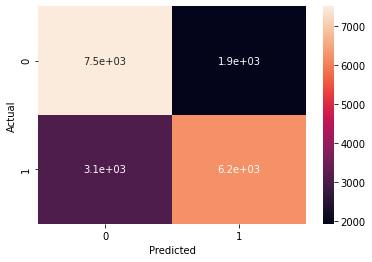

In [219]:
#Plotting TP, FP, FN and TN
confusion_matrix = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [220]:
print('Accuracy :', metrics.accuracy_score(y_test, y_pred2))
plt.show()

Accuracy : 0.732793090579517


**Random Forests Model Summary**

1. Are there any model assumptions violated?

    No model assumptions are violated

2. Is there any multicollinearity in the model?

    Yes, there are a few features which exhibit multicollinearity as per  the VIF table

3.  In the multivariate models are predictor variables independent of all the other predictor variables?

    Multivariate models have not been used

4. Does the model make sense?

    The Random Forest model exhibits high variance for the training set, overfitting the model.

5. Does regularization help?

    Regularization was not required for the model.


7. Which hyperparameters are important?

   The n_estimators and the max_depth of the trees were important which prevented the model from overfitting


### **2. Logistic Regression**

In [ ]:
#Building a Model and tuning the Hyperparameters
lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

paramgrid = dict(solver = solvers, penalty=penalty, C= c_values)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
model2 = GridSearchCV(estimator=lr, param_grid=paramgrid, n_jobs=-1, cv = cv, scoring = 'accuracy', error_score=0)
grid_result = model2.fit(x_train, y_train)



In [ ]:
print("Best: %f using %s" % (model2.best_score_, model2.best_params_))

Best: 0.725236 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
means = model2.cv_results_['mean_test_score']
stds = model2.cv_results_['std_test_score']
params = model2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

0.724791 (0.005074) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.704267 (0.021767) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.724782 (0.005066) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.724782 (0.005095) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.704640 (0.022229) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.724889 (0.005026) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.724809 (0.005095) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.707316 (0.016623) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.725236 (0.004757) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.724827 (0.005071) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.700098 (0.019787) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.724356 (0.005383) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.724613 (0.005223) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.714009 (0.01554

In [ ]:
#Building the Logistic Regression model with Best params
solvers = ['liblinear']
penalty = ['l2']
c_values = [1.0]

paramgrid2 = dict(solver = solvers, penalty=penalty, C= c_values)
model_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=paramgrid2,n_jobs=-1, cv = 3)
model_lr.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1.0], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [238]:
#Training Set Accuracy
y_pred10 = model_lr.predict(x_train)
lr_classification = classification_report(y_train, y_pred10)
print(accuracy_report5)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6340
           1       0.76      0.68      0.71      6160

    accuracy                           0.73     12500
   macro avg       0.74      0.73      0.73     12500
weighted avg       0.73      0.73      0.73     12500



In [239]:
accuracy_report10 = accuracy_score(y_train, y_pred10)

In [257]:
#Validation Set Accuracy
y_pred5 = model_lr.predict(x_val)
lr_classification1 = classification_report(y_val, y_pred5)
print(lr_classification1)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6340
           1       0.76      0.68      0.71      6160

    accuracy                           0.73     12500
   macro avg       0.74      0.73      0.73     12500
weighted avg       0.73      0.73      0.73     12500



In [258]:
accuracy_report5 = accuracy_score(y_val, y_pred5)

In [240]:
#Test Set Accuracy
y_pred6 = model_lr.predict(x_test)
lr_classification1 = classification_report(y_test, y_pred6)
print(accuracy_report6)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      9444
           1       0.75      0.67      0.71      9313

    accuracy                           0.72     18757
   macro avg       0.73      0.72      0.72     18757
weighted avg       0.73      0.72      0.72     18757



In [242]:
accuracy_report6 = accuracy_score(y_test, y_pred6)

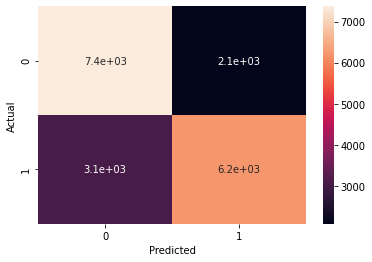

In [ ]:
#Plotting TP, FP, FN, TN
confusion_matrix = pd.crosstab(y_test, y_pred6, rownames=['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy :', metrics.accuracy_score(y_test, y_pred6))
plt.show()

Accuracy : 0.7249560164205363


## **Logistic Regression Model Summary**

1. Are there any model assumptions violated?

    No model assumptions are violated

2. Is there any multicollinearity in the model?

    Yes, there are a few features which exhibit multicollinearity as per  the VIF table

3.  In the multivariate models are predictor variables independent of all the other predictor variables?

    Multivariate models have not been used

4. Does the model make sense?

    The model exhibits a good bias-variance tradeoff.

5. Does regularization help?

    Regularization was not required for the model.


7. Which hyperparameters are important?

   The liblinear solver, penalty and c_values are the important hyperparameters

### **3. Gradient Boosting Classifier**

In [ ]:
#Model_3

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features=5, max_depth = 4, random_state = 0)
    gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(x_val, y_val)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.738
Accuracy score (validation): 0.738

Learning rate:  0.1
Accuracy score (training): 0.741
Accuracy score (validation): 0.739

Learning rate:  0.25
Accuracy score (training): 0.747
Accuracy score (validation): 0.737

Learning rate:  0.5
Accuracy score (training): 0.754
Accuracy score (validation): 0.730

Learning rate:  0.75
Accuracy score (training): 0.761
Accuracy score (validation): 0.725

Learning rate:  1
Accuracy score (training): 0.761
Accuracy score (validation): 0.719



In [ ]:
#Building the model on the best params
model3 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_features=5, max_depth = 4, random_state=0)
model3.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [243]:
#Training Set Accuracy
y_pred7 = model3.predict(x_train)
gb_classification = classification_report(y_train, y_pred7)
print(accuracy_report7)

              precision    recall  f1-score   support

           0       0.72      0.79      0.76     18981
           1       0.76      0.69      0.72     18519

    accuracy                           0.74     37500
   macro avg       0.74      0.74      0.74     37500
weighted avg       0.74      0.74      0.74     37500



In [244]:
accuracy_report7 = accuracy_score(y_train, y_pred7)

In [253]:
#Validation Set Accuracy
y_pred8 = model3.predict(x_val)
gb_classification1 = classification_report(y_val, y_pred8)
print(gb_classification1)

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6340
           1       0.76      0.69      0.72      6160

    accuracy                           0.74     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.74      0.74      0.74     12500



In [246]:
accuracy_report8 = accuracy_score(y_val, y_pred8)

In [259]:
#Test Set Accuracy
y_pred9 = model3.predict(x_test)
gb_classification2 = classification_report(y_test, y_pred9)
print(gb_classification2)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      9444
           1       0.76      0.68      0.72      9313

    accuracy                           0.73     18757
   macro avg       0.74      0.73      0.73     18757
weighted avg       0.74      0.73      0.73     18757



In [263]:
accuracy_report9 = accuracy_score(y_test, y_pred9)

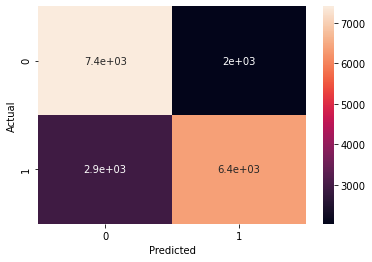

In [ ]:
#Plotting TP, FP, FN and TN
confusion_matrix = pd.crosstab(y_test, y_pred9, rownames=['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Feature: 0, Score: 0.13422
Feature: 1, Score: 0.00198
Feature: 2, Score: 0.45340
Feature: 3, Score: 0.24756
Feature: 4, Score: 0.09893
Feature: 5, Score: 0.00821
Feature: 6, Score: 0.00359
Feature: 7, Score: 0.00369
Feature: 8, Score: 0.00714
Feature: 9, Score: 0.04128


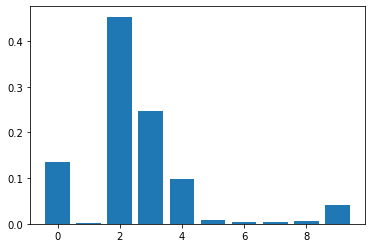

In [ ]:
#Calculating Feature Importance for the model
importance3 = model3.feature_importances_

for i, v in enumerate(importance3):
  print('Feature: %0d, Score: %.5f' %(i, v))

pyplot.bar([x for x in range(len(importance3))], importance3)
pyplot.show()

In [ ]:
print('Accuracy :', metrics.accuracy_score(y_test, y_pred9))
plt.show()

Accuracy : 0.7347656874766754


## **Gradient Boosting Model Summary**

1. Are there any model assumptions violated?

    No model assumptions were violated

2. Is there any multicollinearity in the model?

    Yes, there are a few features which exhibit multicollinearity as per  the VIF table

3.  In the multivariate models are predictor variables independent of all the other predictor variables?

    Multivariate models have not been used

4. Does the model make sense?

    The model exhibits a good bias-variance tradeoff and gives the max accuracy out of the three models

5. Does regularization help?

    Regularization was not required for the model.

6. Which independent variables were significant?

  The age, ap_hi, ap_lo and cholestrol were the significant variables.

7. Which hyperparameters are important?

  n_estimators, learning_rate, max_features, max_depth and random_state were some of the important hyperparameters

### **Models Summary**

In [264]:
#Models Summary

models = pd.DataFrame({'Model': ['Random Forests', 'Logistic Regression', 'GradientBoostingClassifier'],
                       'Score_train': [model1_rf_accuracy, accuracy_report10, accuracy_report7],
                       'Score_val': [model1_rf_accuracy1, accuracy_report5, accuracy_report8],
                       'Score_test': [model1_rf_accuracy2, accuracy_report6, accuracy_report9]})

In [266]:
models.sort_values(by=['Score_train', 'Score_val', 'Score_test'], ascending=False)

,Model,Score_train,Score_val,Score_test
0,Random Forests,0.755360,0.73768,0.732793
2,GradientBoostingClassifier,0.740773,0.73864,0.734766
1,Logistic Regression,0.725440,0.73264,0.724956


## **Conclusion**

By Training and optimizing 3 models, it is observed that all 3 models display similar efficiency and accuracy in predicting the Cardiovascular disease in an individual.

### **References**

1. Towards Data Science 
2. Referred Machine Learning Mastery and Kaggle notebook for GridSearchCV and Hyperparameter tuning for Random Forests , Logistic Regression and feature importances. 
3. Referred Analytics Vidhya on MultiColinearity VIF table
4. Referred Kaggle Notebook to convert height and weight into BMI and to remove the outliers, visualization of age vs cvd graph, models summary
5. Referred Stackoverflow on how to use 'sep' command in colab and how to read the data in. 
6. Determining Correlation in the column - geeksforgeeks
5. Remaining code was done by me.  







### **LICENSE**

Copyright <2020> Keshav K L

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.